# Splines

In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.interpolate import make_smoothing_spline

from sklearn.model_selection import cross_val_score,train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from scipy.interpolate import RBFInterpolator, InterpolatedUnivariateSpline

cm = 1/2.54  # centimeters in inches

np.random.seed(0)


## Preprocessing

In [2]:
data0=pd.read_csv('data/spnbmd.csv')

# train-test split
#data,data_test = train_test_split(data0, random_state=0)
#(data.shape, data_test.shape)

# no train test split today
data=data0
mal0=data[data.sex=='mal'].sort_values('age')
fem0=data[data.sex=='fem'].sort_values('age')

In [3]:
set(data.ethnic)

{'Asian', 'Black', 'Hispanic', 'White'}

In [13]:
temp=data[data.sex=='mal'].sort_values('age')
a0=temp[(temp.age>21.5) ]
a0[(a0.age<22.5)]['spnbmd'].mean()

1.0701538461538462

## Spline

 -requires unique sorted values
 -weights to specify multiple records; calculate the average

In [5]:
mal=mal0.groupby('age')['spnbmd'].mean()
fem=fem0.groupby('age')['spnbmd'].mean()
w_mal=mal0.groupby('age')['spnbmd'].count()
w_fem=fem0.groupby('age')['spnbmd'].count()

mal [[1.0467112]]
fem [[1.07211489]]


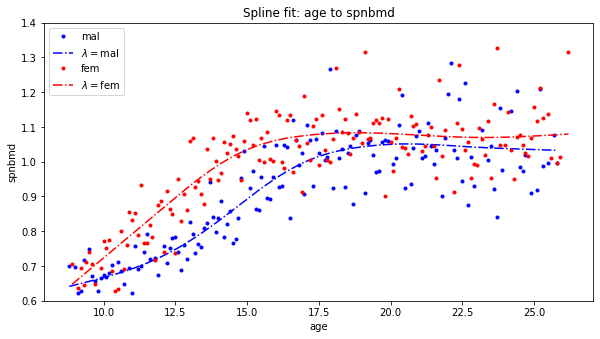

In [6]:
plt.subplots(figsize=(25*cm, 13*cm))

for (dat,w,label,color) in zip([mal, fem],[w_mal, w_fem],['mal','fem'],['blue','red']):
    plt.plot(dat,'.', label='{}'.format(label),color=color)
    spl = make_smoothing_spline(dat.index,dat.values, w=w,lam=None)
    print(label, spl([[22]]))

    plt.plot(dat.index, spl(dat.index), '-.', label=fr'$\lambda=${label}',color=color)


plt.ylabel('spnbmd')
plt.xlabel('age')
plt.title('Spline fit: age to spnbmd')
plt.ylim(0.6,1.4)


plt.legend()
plt.savefig('figures/spline.pdf')
plt.show()

## Linear Regression

mal [[1.07577629]]
fem [[1.10776122]]


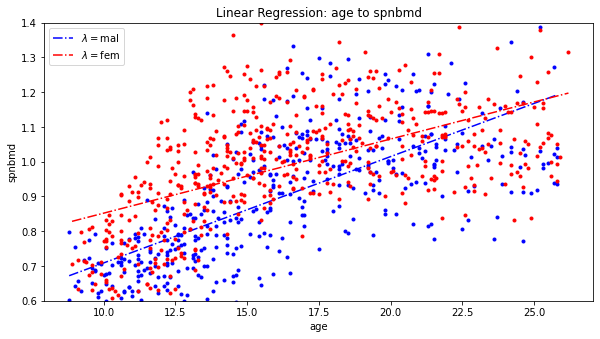

In [7]:
plt.subplots(figsize=(25*cm, 13*cm))

for (dat,w,label,color) in zip([mal0[['age','spnbmd']], fem0[['age','spnbmd']]],[w_mal, w_fem],
                                ['mal','fem'],['blue','red']):
    plt.plot(dat.age, dat.spnbmd,'.',color=color)
    
    clf = LinearRegression().fit((dat.age).values.reshape(-1, 1), (dat.spnbmd.values).reshape(-1, 1))
    y_model=clf.predict((dat.age).values.reshape(-1, 1))
    print(label, clf.predict([[22]]))
    plt.plot((dat.age).values.reshape(-1, 1), y_model, '-.', label=fr'$\lambda=${label}',color=color)

plt.ylabel('spnbmd')
plt.xlabel('age')
plt.title('Linear Regression: age to spnbmd')
plt.ylim(0.6,1.4)


plt.legend()
plt.savefig('figures/linear.pdf')

plt.show()


## k-Nearest Neighbours

mal [[1.03902]]
fem [[1.06728]]


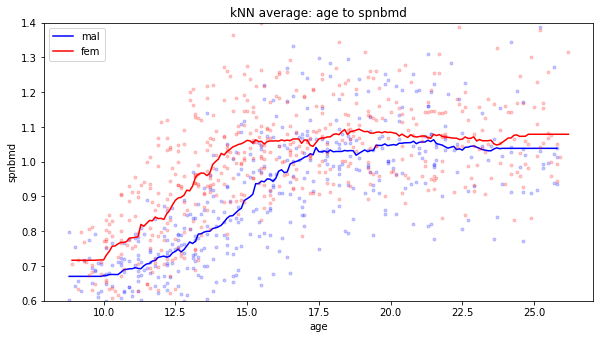

In [8]:
plt.subplots(figsize=(25*cm, 13*cm))

for (dat,w,label,color) in zip([mal0[['age','spnbmd']], fem0[['age','spnbmd']]],[w_mal, w_fem],
                                ['mal','fem'],['blue','red']):
    plt.plot(dat.age, dat.spnbmd,'.',color=color,alpha=0.2)
    
    clf = KNeighborsRegressor(n_neighbors=50).fit((dat.age).values.reshape(-1, 1), (dat.spnbmd.values).reshape(-1, 1))
    y_model=clf.predict((dat.age).values.reshape(-1, 1))
    print(label, clf.predict([[22]]))
    plt.plot((dat.age).values.reshape(-1, 1), y_model, '-', label=fr'{label}',color=color)


plt.ylabel('spnbmd')
plt.xlabel('age')
plt.title('kNN average: age to spnbmd')
plt.ylim(0.6,1.4)


plt.legend()
plt.savefig('figures/kNN.pdf')

plt.show()

In [14]:
# The previous model is better. This is just averaging.

plt.subplots(figsize=(25*cm, 13*cm))

for (dat,w,label,color) in zip([mal0[['age','spnbmd']], fem0[['age','spnbmd']]],[w_mal, w_fem],
                                ['mal','fem'],['blue','red']):
    plt.plot(dat.age, dat.spnbmd,'.',color=color)
    
#    plt.fill_between(x=data.groupby('age')['spnbmd'].max().index,
#                     y1=data.groupby('age')['spnbmd'].min(), 
#                     y2=data.groupby('age')['spnbmd'].max(), alpha=0.1, linewidth=2, color='seagreen')

    plt.plot(dat.age,dat.spnbmd.rolling(25,center=True,closed='both').mean(),label='25NN {}'.format(label),
             linestyle=':',color=color)
    plt.plot(dat.age,dat.spnbmd.rolling(40,center=True,closed='both').mean(),label='40NN {}'.format(label),
             linestyle='-',color=color)

plt.ylabel('spnbmd')
plt.xlabel('age')
plt.title('kNN average: spnbmd')
plt.ylim(0.6,1.4)

plt.legend()
plt.show()


## Kernal Smoothing RBF

mal [[1.04512495]]
fem [[1.07113923]]


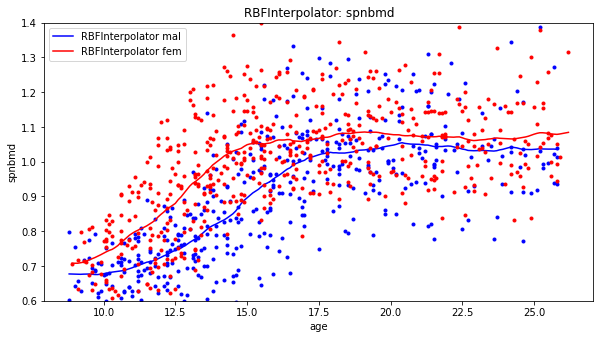

In [10]:
plt.subplots(figsize=(25*cm, 13*cm))

for (dat,w,label,color) in zip([mal0[['age','spnbmd']], fem0[['age','spnbmd']]],[w_mal, w_fem],
                                ['mal','fem'],['blue','red']):
    plt.plot(dat.age, dat.spnbmd,'.',color=color)
    
    rbf = RBFInterpolator((dat.age).values.reshape(-1, 1), (dat.spnbmd.values).reshape(-1, 1), 
                          smoothing=30, kernel='linear')#, epsilon=2000)
    fi = rbf((dat.age).values.reshape(-1, 1))
    print(label, rbf([[22]]))
    plt.plot(dat.age,fi,label='RBFInterpolator {}'.format(label),
             linestyle='-',color=color)

#yi = iu(mal.index)
plt.ylabel('spnbmd')
plt.xlabel('age')
plt.title('RBFInterpolator: spnbmd')
plt.ylim(0.6,1.4)


plt.legend()
plt.savefig('figures/rbf.pdf')

plt.show()


## Data Split by Etnicity

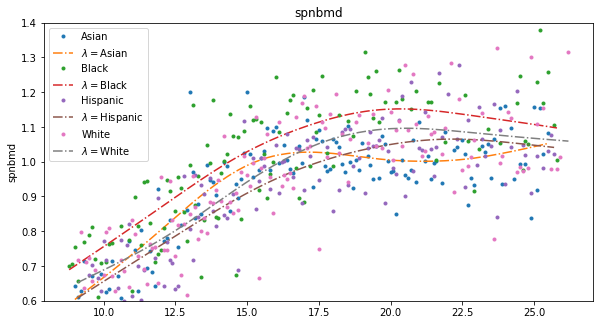

In [11]:
plt.subplots(figsize=(25*cm, 13*cm))

for who in set(data.ethnic):
    dat0=data[data.ethnic==who].sort_values('age')
    dat=dat0.groupby('age')['spnbmd'].mean()
    w_dat=dat0.groupby('age')['spnbmd'].count()
    plt.plot(dat,'.', label='{}'.format(who))
    spl = make_smoothing_spline(dat.index,dat.values, w=w_dat,lam=None)
    plt.plot(dat.index, spl(dat.index), '-.', label=fr'$\lambda=${who}')


plt.ylabel('spnbmd')
plt.title('spnbmd')
plt.ylim(0.6,1.4)


plt.legend()
plt.show()